In [6]:
!pip install yfinance
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 2.8 MB/s eta 0:00:00a 0:00:010m
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.5/73.5 kB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 112.2/112.2 kB 4.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.2/8.2 MB 5.9 MB/s eta 0:00:0000:0100:01
  Created wheel for peewee: filename=peewee-3.17.6-py3-none-any.whl size=138890 sha256=abcc1c486193ecdd33e7d7100b26523cbbebbf4dbb5549d82ec73eece00bdea6
  Stored in directory: /Users/bhoomikavrati/Library/Caches/pip/wheels/a6/5e/0f/8319805c4115320e0d3e8fb5799b114a2e4c4a3d6c7e523b06
Successfully built peewee

[notice] A new release of pip is available: 23.3.1 -> 24.2
[notice] To update, run: pip install --upgrade pip


In [9]:
start='2014-01-01'
end='2024-12-31'

df=yf.download('AAPL', start=start, end=end)
print(df.head())

[*********************100%%**********************]  1 of 1 completed

                 Open       High        Low      Close  Adj Close     Volume
Date                                                                        
2014-01-02  19.845715  19.893929  19.715000  19.754642  17.273230  234684800
2014-01-03  19.745001  19.775000  19.301071  19.320715  16.893810  392467600
2014-01-06  19.194643  19.528570  19.057142  19.426071  16.985929  412610800
2014-01-07  19.440001  19.498571  19.211430  19.287144  16.864454  317209200
2014-01-08  19.243214  19.484285  19.238930  19.409286  16.971254  258529600


In [10]:
df=df.reset_index()
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2014-01-02,19.845715,19.893929,19.715000,19.754642,17.273230,234684800
1,2014-01-03,19.745001,19.775000,19.301071,19.320715,16.893810,392467600
2,2014-01-06,19.194643,19.528570,19.057142,19.426071,16.985929,412610800
3,2014-01-07,19.440001,19.498571,19.211430,19.287144,16.864454,317209200
4,2014-01-08,19.243214,19.484285,19.238930,19.409286,16.971254,258529600


In [11]:
df=df.drop(['Date', 'Adj Close'], axis=1)
df.head()

,Open,High,Low,Close,Volume
0,19.845715,19.893929,19.715000,19.754642,234684800
1,19.745001,19.775000,19.301071,19.320715,392467600
2,19.194643,19.528570,19.057142,19.426071,412610800
3,19.440001,19.498571,19.211430,19.287144,317209200
4,19.243214,19.484285,19.238930,19.409286,258529600


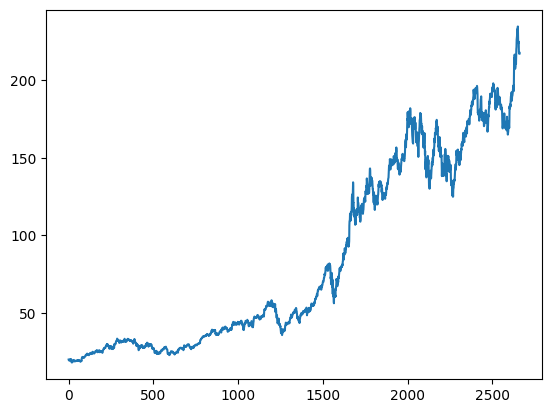

In [12]:
plt.plot(df.Close)

In [13]:
df

,Open,High,Low,Close,Volume
0,19.845715,19.893929,19.715000,19.754642,234684800
1,19.745001,19.775000,19.301071,19.320715,392467600
2,19.194643,19.528570,19.057142,19.426071,412610800
3,19.440001,19.498571,19.211430,19.287144,317209200
4,19.243214,19.484285,19.238930,19.409286,258529600
...,...,...,...,...,...
2656,224.000000,224.800003,217.130005,218.539993,61777600
2657,218.929993,220.850006,214.619995,217.490005,51391200
2658,218.699997,219.490005,216.009995,217.960007,41601300
2659,216.960007,219.300003,215.750000,218.240005,36261400


In [14]:
ma100=df.Close.rolling(100).mean()
ma100

0            NaN
1            NaN
2            NaN
3            NaN
4            NaN
          ...   
2656    190.4912
2657    190.8695
2658    191.2981
2659    191.7793
2660    192.2615
Name: Close, Length: 2661, dtype: float64

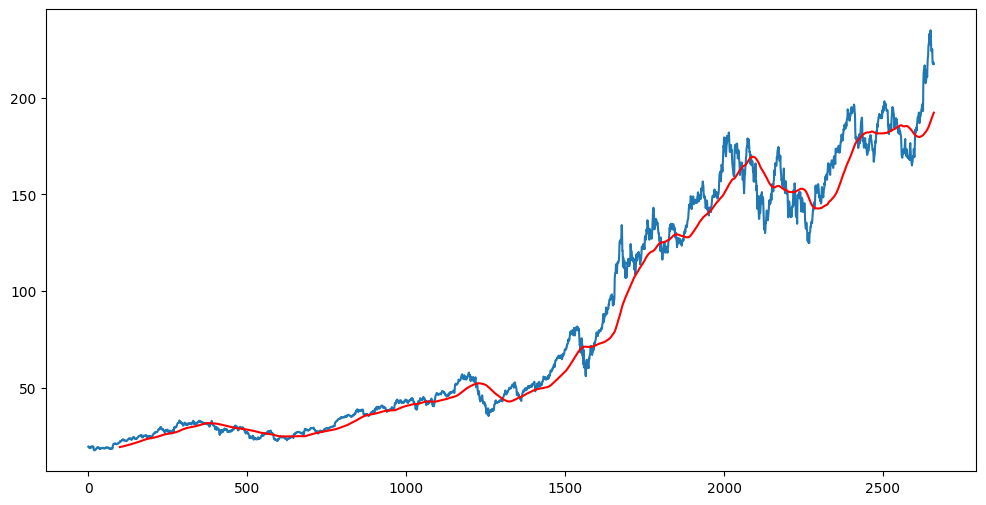

In [15]:
plt.figure(figsize=(12,6))
plt.plot(df.Close)
plt.plot(ma100, 'r')

In [16]:
ma200=df.Close.rolling(200).mean()
ma200

0             NaN
1             NaN
2             NaN
3             NaN
4             NaN
          ...    
2656    188.12235
2657    188.32235
2658    188.51720
2659    188.71645
2660    188.90415
Name: Close, Length: 2661, dtype: float64

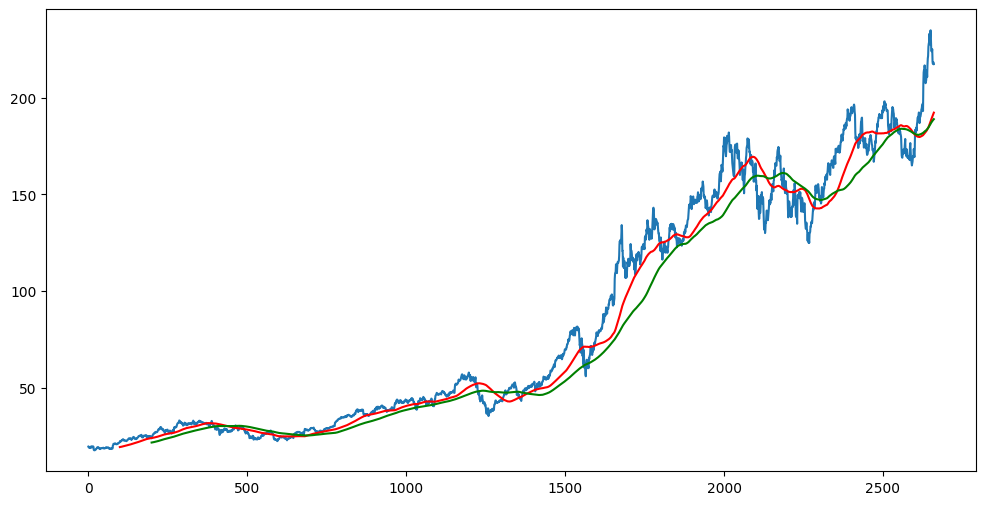

In [18]:
plt.figure(figsize=(12,6))
plt.plot(df.Close)
plt.plot(ma100, 'r')
plt.plot(ma200, 'g')

In [19]:
df.shape

(2661, 5)

In [21]:
data_training = pd.DataFrame(df['Close'][0:int(len(df) * 0.70)])
data_testing = pd.DataFrame(df['Close'][int(len(df) * 0.70):int(len(df))])

print(data_training.shape)
print(data_testing.shape)

(1862, 1)
(799, 1)


In [22]:
data_training.head()

,Close
0,19.754642
1,19.320715
2,19.426071
3,19.287144
4,19.409286


In [23]:
data_testing.head()

,Close
1862,126.849998
1863,125.279999
1864,124.610001
1865,124.279999
1866,125.059998


In [24]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))

In [25]:
data_training_array=scaler.fit_transform(data_training)
data_training_array

array([[0.01520506],
       [0.01174225],
       [0.01258301],
       ...,
       [0.85851168],
       [0.87183854],
       [0.87024253]])

In [28]:
x_train=[]
y_train=[]

for i in range(100, data_training_array.shape[0]):
    x_train.append(data_training_array[i-100:i])
    y_train.append(data_training_array[i,0])

x_train, y_train=np.array(x_train), np.array(y_train)

In [32]:
from keras.layers import Dense, Dropout, LSTM, Input
from keras.models import Sequential

In [34]:
model = Sequential()
model.add(Input(shape=(x_train.shape[1], 1)))
model.add(LSTM(units=50, activation='relu', return_sequences=True))
model.add(Dropout(0.2))

model.add(LSTM(units=60, activation='relu', return_sequences=True))
model.add(Dropout(0.3))

model.add(LSTM(units=80, activation='relu', return_sequences=True))
model.add(Dropout(0.4))

model.add(LSTM(units=120, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(units=1))

In [35]:
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_2 (LSTM)                   │ (None, 100, 50)        │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 100, 50)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_3 (LSTM)                   │ (None, 100, 60)        │        26,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 100, 60)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_4 (LSTM)                   │ (None, 100, 80)        │        45,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 100, 80)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_5 (LSTM)                   │ (None, 120)            │        96,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 120)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │           121 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 178,761 (698.29 KB)

 Trainable params: 178,761 (698.29 KB)

 Non-trainable params: 0 (0.00 B)

In [37]:
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(x_train, y_train, epochs=50)

Epoch 1/50
56/56 ━━━━━━━━━━━━━━━━━━━━ 7s 92ms/step - loss: 0.0025
Epoch 2/50
56/56 ━━━━━━━━━━━━━━━━━━━━ 6s 99ms/step - loss: 0.0034 
Epoch 3/50
56/56 ━━━━━━━━━━━━━━━━━━━━ 6s 102ms/step - loss: 0.0019
Epoch 4/50
56/56 ━━━━━━━━━━━━━━━━━━━━ 5s 96ms/step - loss: 0.0025
Epoch 5/50
56/56 ━━━━━━━━━━━━━━━━━━━━ 5s 96ms/step - loss: 0.0020
Epoch 6/50
56/56 ━━━━━━━━━━━━━━━━━━━━ 5s 96ms/step - loss: 0.0019
Epoch 7/50
56/56 ━━━━━━━━━━━━━━━━━━━━ 5s 95ms/step - loss: 0.0020
Epoch 8/50
56/56 ━━━━━━━━━━━━━━━━━━━━ 5s 96ms/step - loss: 0.0023
Epoch 9/50
56/56 ━━━━━━━━━━━━━━━━━━━━ 5s 96ms/step - loss: 0.0025
Epoch 10/50
56/56 ━━━━━━━━━━━━━━━━━━━━ 6s 100ms/step - loss: 0.0021
Epoch 11/50
56/56 ━━━━━━━━━━━━━━━━━━━━ 5s 97ms/step - loss: 0.0018
Epoch 12/50
56/56 ━━━━━━━━━━━━━━━━━━━━ 5s 96ms/step - loss: 0.0023
Epoch 13/50
56/56 ━━━━━━━━━━━━━━━━━━━━ 5s 96ms/step - loss: 0.0021
Epoch 14/50
56/56 ━━━━━━━━━━━━━━━━━━━━ 5s 96ms/step - loss: 0.0023
Epoch 15/50
56/56 ━━━━━━━━━━━━━━━━━━━━ 5s 97ms/step - loss: 0.0020
E

In [41]:
model.save('keras_model.h5')

In [43]:
data_testing.head()

,Close
1862,126.849998
1863,125.279999
1864,124.610001
1865,124.279999
1866,125.059998


In [44]:
past_100_days=data_training.tail(100)

In [47]:
final_df = pd.concat([past_100_days, data_testing], ignore_index=True)

In [48]:
final_df.head()

,Close
0,132.690002
1,129.410004
2,131.009995
3,126.599998
4,130.919998


In [50]:
input_data=scaler.fit_transform(final_df)
input_data

array([[0.13785245],
       [0.11016379],
       [0.12367038],
       [0.08644266],
       [0.12291066],
       [0.13244979],
       [0.1065338 ],
       [0.10501437],
       [0.12265742],
       [0.10594295],
       [0.09100117],
       [0.09682594],
       [0.13228092],
       [0.17313856],
       [0.19171033],
       [0.22421067],
       [0.22623672],
       [0.21695083],
       [0.17499573],
       [0.13169007],
       [0.15009284],
       [0.15726831],
       [0.14840453],
       [0.17752826],
       [0.17220997],
       [0.17347629],
       [0.16587872],
       [0.16064492],
       [0.15845014],
       [0.16047605],
       [0.14207328],
       [0.12223531],
       [0.11269631],
       [0.11404688],
       [0.08137767],
       [0.08019584],
       [0.07589057],
       [0.0390849 ],
       [0.04136418],
       [0.09648826],
       [0.07394903],
       [0.04811748],
       [0.03182506],
       [0.04271482],
       [0.        ],
       [0.03992905],
       [0.03055886],
       [0.047

In [51]:
x_test=[]
y_test=[]

for i in range(100, input_data.shape[0]):
    x_test.append(input_data[i-100:i])
    y_test.append(input_data[i,0])

In [52]:
x_test, y_test=np.array(x_test), np.array(y_test)
print(x_test.shape)
print(y_test.shape)

(799, 100, 1)
(799,)


In [53]:
y_predicted=model.predict(x_test)

25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step


In [54]:
y_predicted.shape

(799, 1)

In [55]:
y_test

array([0.08855308, 0.07529966, 0.06964376, 0.06685799, 0.07344248,
       0.06061118, 0.08044908, 0.08053352, 0.08762449, 0.09091673,
       0.08230626, 0.09277391, 0.11919631, 0.11210534, 0.11641054,
       0.13025487, 0.11902756, 0.1345602 , 0.14874214, 0.14637849,
       0.14393046, 0.14139793, 0.1554955 , 0.16858011, 0.1738984 ,
       0.1765153 , 0.19922341, 0.21661322, 0.2381395 , 0.22691207,
       0.24269794, 0.23754852, 0.24717202, 0.27680222, 0.27114632,
       0.25350327, 0.22024308, 0.25147722, 0.24514597, 0.25696438,
       0.27182167, 0.27545165, 0.25671114, 0.24160049, 0.24717202,
       0.24902919, 0.24615906, 0.2616917 , 0.25823058, 0.25915917,
       0.25139285, 0.25097074, 0.24683441, 0.24902919, 0.27460744,
       0.27638024, 0.29343232, 0.28558163, 0.25325003, 0.25612016,
       0.2686983 , 0.28152967, 0.28076982, 0.27013336, 0.26321113,
       0.27215941, 0.31031565, 0.29942596, 0.30516623, 0.31478973,
       0.32027689, 0.34045247, 0.32711462, 0.31833534, 0.27528

In [56]:
scaler.scale_

array([0.00844167])

In [58]:
scale_factor=1/0.02099517
y_predicted=y_predicted*scale_factor
y_test=y_test*scale_factor

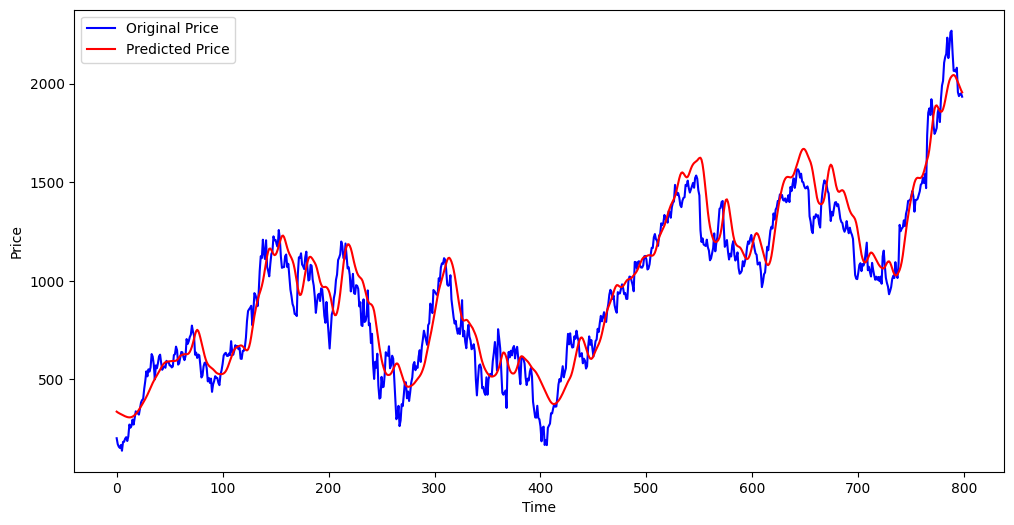

In [59]:
plt.figure(figsize=(12,6))
plt.plot(y_test, 'b', label='Original Price')
plt.plot(y_predicted, 'r', label='Predicted Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()